In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter

In [273]:
dfnetflix = pd.read_csv('Netflix_Dataset.csv')

In [274]:
dfnetflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9-Sep-19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,9-Sep-16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,8-Sep-18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,8-Sep-18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,8-Sep-17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [275]:
dfnetflix['year_added'] = "20" + dfnetflix['date_added'].str[-2:]
dfnetflix.year_added.fillna(dfnetflix.release_year, inplace=True)
dfnetflix.drop(['date_added'], axis=1)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",2015
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",2016
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...,2016
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",2013


In [276]:
dfnetflix.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
year_added         0
dtype: int64

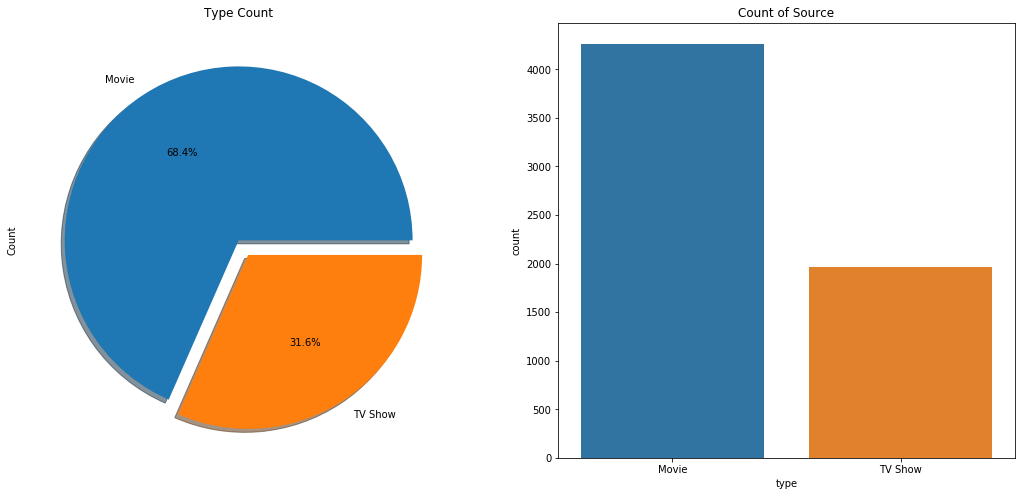

In [277]:
import matplotlib.pyplot as plt

f,ax=plt.subplots(1,2,figsize=(18,8))
dfnetflix['type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Type Count')
ax[0].set_ylabel('Count')
sns.countplot('type',data=dfnetflix,ax=ax[1],order=dfnetflix['type'].value_counts().index)
ax[1].set_title('Count of Source')
plt.show()

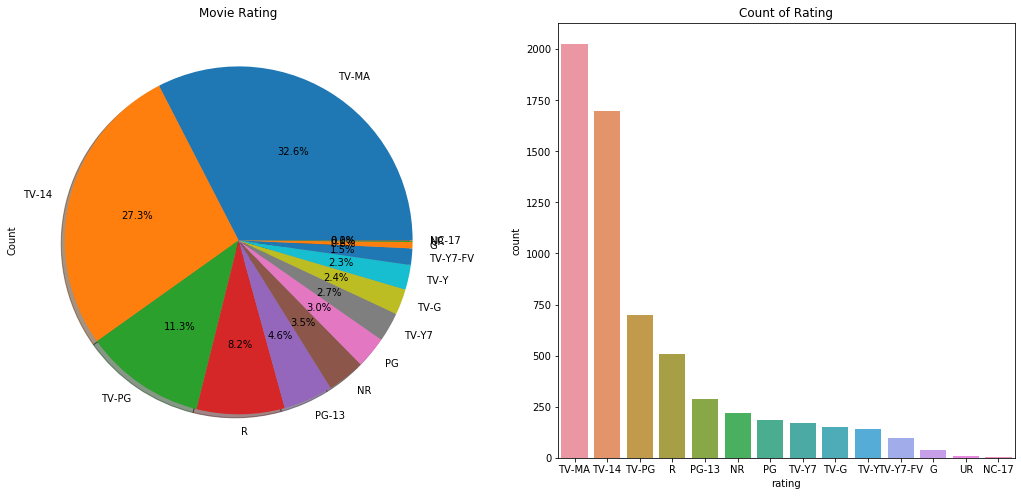

In [278]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dfnetflix['rating'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Movie Rating')
ax[0].set_ylabel('Count')
sns.countplot('rating',data=dfnetflix,ax=ax[1],order=dfnetflix['rating'].value_counts().index)
ax[1].set_title('Count of Rating')
plt.show()

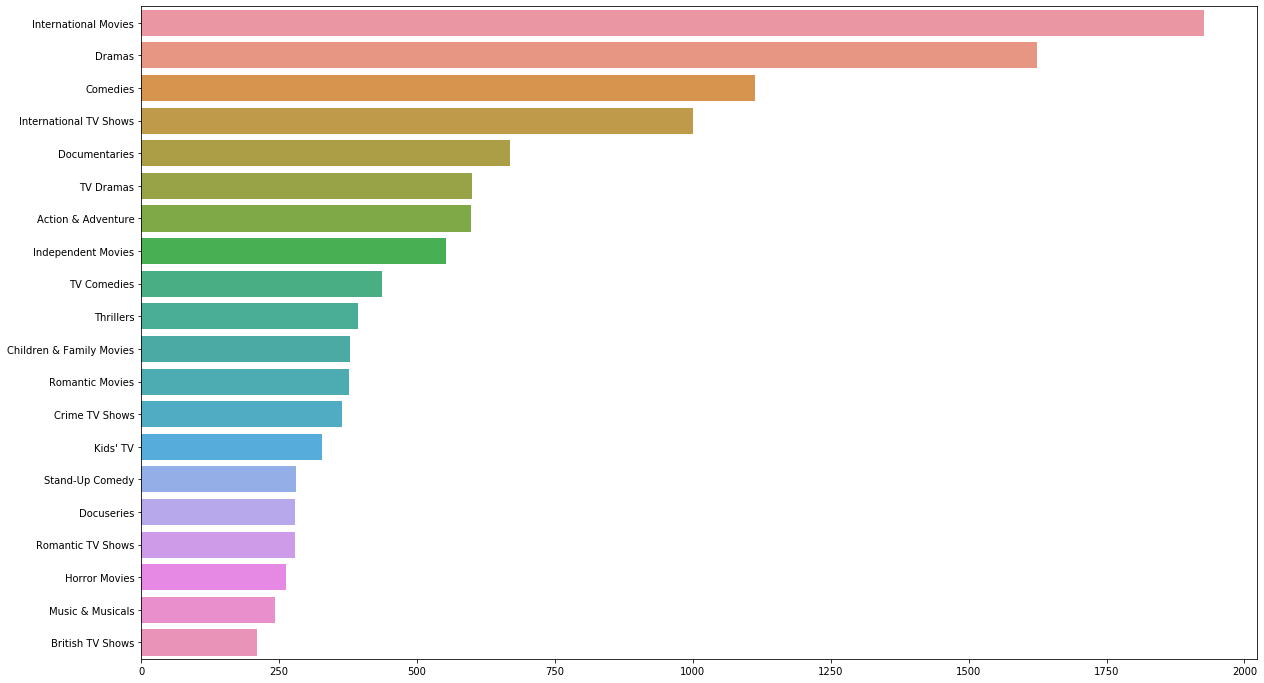

In [279]:
genre = dfnetflix['listed_in']
genre = pd.Series(dict(Counter(','.join(genre).replace(' ,',',').replace(', ',',')
                                       .split(',')))).sort_values(ascending=False)

genre = genre[:20]
plt.figure(figsize=(20,12))
sns.barplot(genre, genre.index)
plt.show()

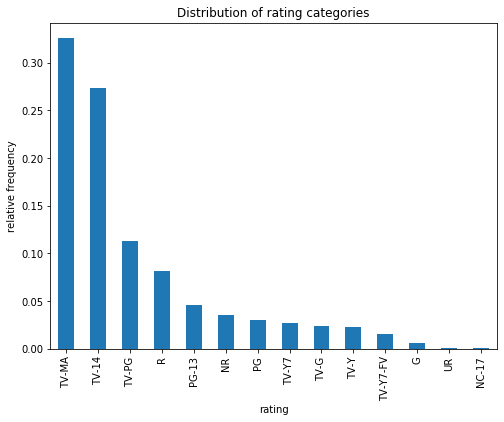

In [280]:
plt.figure(figsize=(8,6))
dfnetflix['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

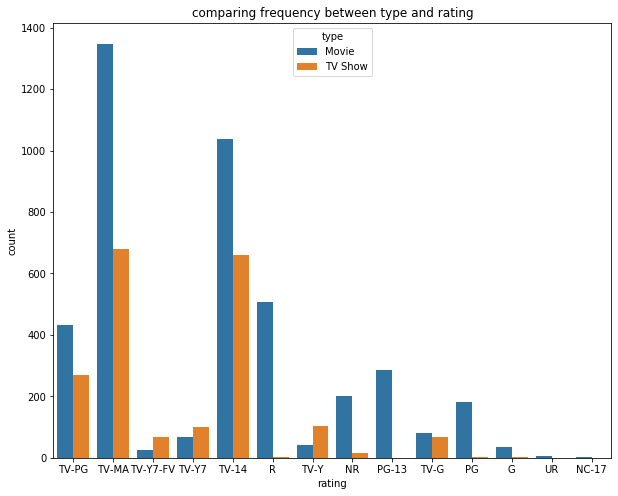

In [281]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=dfnetflix)
plt.title('comparing frequency between type and rating')
plt.show()

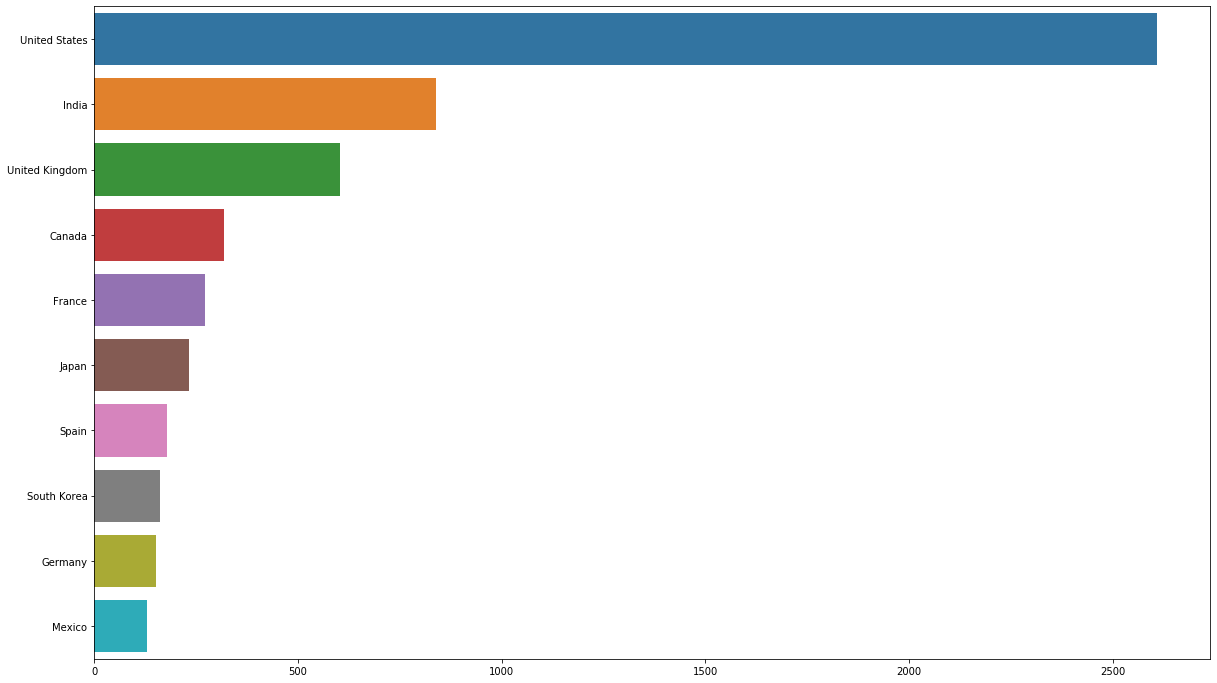

In [282]:
dfcountry = dfnetflix[dfnetflix['country'].notna()]

country = pd.Series(dict(Counter(','.join(dfcountry['country']).replace(' ,',',').replace(', ',',')
                                       .split(',')))).sort_values(ascending=False)

country = country[:10]
plt.figure(figsize=(20,12))
sns.barplot(country, country.index)
plt.show()

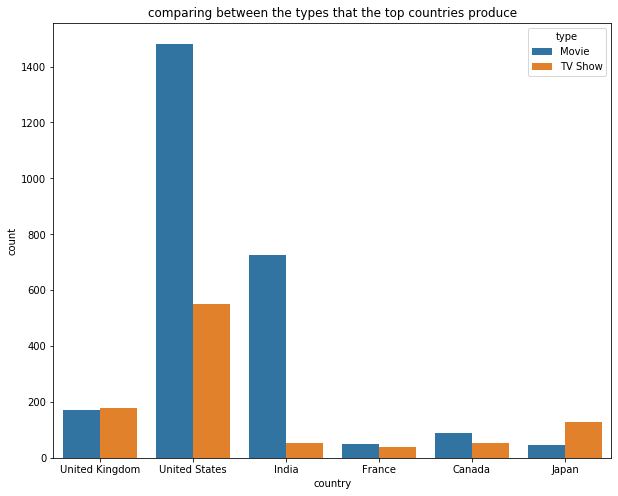

In [283]:
top_productive_countries=dfnetflix[(dfnetflix['country']=='United States')|(dfnetflix['country']=='India')|(dfnetflix['country']=='United Kingdom')|(dfnetflix['country']=='Canada')|
                             (dfnetflix['country']=='France')|(dfnetflix['country']=='Japan')]
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('comparing between the types that the top countries produce')
plt.show()

In [284]:
dfnetflix['year_added']= dfnetflix['year_added'].astype(str) 
dfnetflix['year_added'] = np.where((dfnetflix.year_added == '2003'),'2008',dfnetflix.year_added)                                            

In [285]:
dfnetflix.groupby('year_added')['type'].value_counts(normalize=True)*100

year_added  type   
2008        TV Show     80.000000
            Movie       20.000000
2009        Movie      100.000000
2010        Movie       50.000000
            TV Show     50.000000
2011        Movie      100.000000
2012        Movie       50.000000
            TV Show     50.000000
2013        TV Show     53.846154
            Movie       46.153846
2014        Movie       76.000000
            TV Show     24.000000
2015        Movie       63.043478
            TV Show     36.956522
2016        Movie       57.860262
            TV Show     42.139738
2017        Movie       70.230769
            TV Show     29.769231
2018        Movie       72.349972
            TV Show     27.650028
2019        Movie       65.815241
            TV Show     34.184759
2020        Movie       79.891304
            TV Show     20.108696
Name: type, dtype: float64

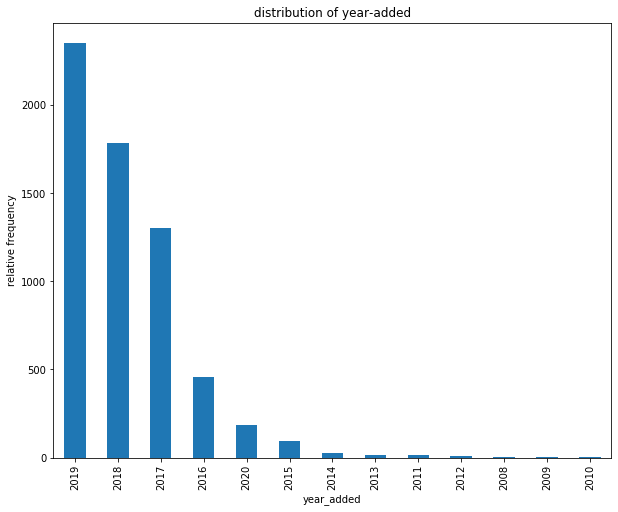

In [286]:
plt.figure(figsize=(10,8))
dfnetflix['year_added'].value_counts().plot.bar()
plt.title('distribution of year-added')
plt.ylabel('relative frequency')
plt.xlabel('year_added')
plt.show()

In [287]:
import nltk

top_N = 10

dfnetflix["newdescription"] = dfnetflix['description'].str.replace('[^\w\s]','')

txt = dfnetflix.newdescription.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

print(rslt)

         Frequency
Word              
life           547
young          511
new            483
family         369
two            360
man            355
world          344
love           336
friends        319
woman          310


In [288]:
dfnetflix['year_added'].value_counts()

2019    2349
2018    1783
2017    1300
2016     458
2020     184
2015      92
2014      25
2013      13
2011      13
2012       8
2008       5
2009       2
2010       2
Name: year_added, dtype: int64

In [289]:
dfyear = dfnetflix['year_added'].value_counts()

In [290]:
dfadded = dfyear.to_frame()
dfadded.columns = ['count']
dfadded = dfadded.sort_index(ascending=True)
dfadded['50pct'] = dfadded.pct_change()
dfadded['50pct'] = np.where(dfadded['50pct'] >= 0.5, 1, 0)
dfadded['year'] = dfadded.index
dfadded = dfadded[['year', 'count', '50pct']]

In [291]:
dfadded

,year,count,50pct
2008,2008,5,0
2009,2009,2,0
2010,2010,2,0
2011,2011,13,1
2012,2012,8,0
2013,2013,13,1
2014,2014,25,1
2015,2015,92,1
2016,2016,458,1
2017,2017,1300,1


In [292]:
dfadded.corr()

,count,50pct
count,1.00000,-0.19636
50pct,-0.19636,1.00000


In [295]:
from sklearn.naive_bayes import GaussianNB   #import Gaussian Bayes modeling function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [296]:
X = dfadded.drop('50pct', axis=1)

y = dfadded['50pct']

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=109)
gnb = GaussianNB()

In [298]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [299]:
gnb.score(X_train, y_train)

0.7777777777777778

In [300]:
y_pred = gnb.predict(X_test)

In [301]:
cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted < 50pct', 'Predicted > 50pct'],
    index=['True < 50pct', 'True > 50pct']
)

cm

,Predicted < 50pct,Predicted > 50pct
True < 50pct,2,0
True > 50pct,1,1


In [302]:
y_test.value_counts()

1    2
0    2
Name: 50pct, dtype: int64

In [303]:
gnb.score(X_test, y_test)

0.75

In [304]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

